In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols = ['age',
        'workclass',
        'fnlwgt',
        'education',
        'education-num',
        'marital-status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'capital-gain',
        'capital-loss',
        'hours-per-week',
        'native-country',
        '>50K, <=50K']

adult = pd.read_csv('adult.data', names=cols, sep=', ')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,">50K, <=50K"
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Step 1. How many males and females are there?

In [3]:
adult['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

### Step 2. What is the mean male age?

In [4]:
adult['age'].loc[adult['sex'] == 'Male'].mean()

39.43354749885268

### Step3: What is the proportion of the US citizens?

In [5]:
(adult['native-country'].value_counts() / adult['native-country'].count())[0] * 100

89.5857006848684

### Step 4. Plot the distribution of people’s education as a bar plot.

In [6]:
adult['education'].value_counts().values

array([10501,  7291,  5355,  1723,  1382,  1175,  1067,   933,   646,
         576,   514,   433,   413,   333,   168,    51])

<BarContainer object of 16 artists>

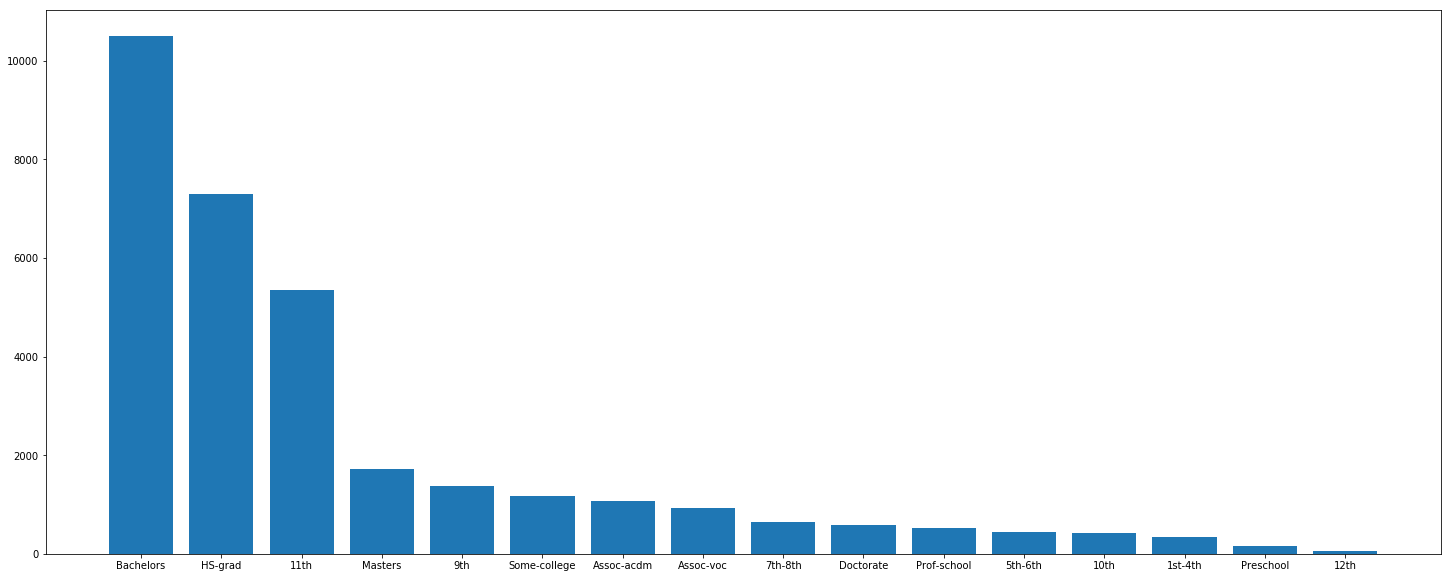

In [7]:
plt.figure(figsize=(25, 10))
plt.bar(adult['education'].unique(), adult['education'].value_counts().values)

### Step 5. What is the mean and standard deviation of the ”final weight” for divorced people?

In [8]:
adult[adult['marital-status'] == 'Divorced'].describe()['fnlwgt'].loc[['mean', 'std']]

mean    185802.790457
std     105646.789459
Name: fnlwgt, dtype: float64

### Step 6. Is it true that the people who receive over 50k are mostly highly educated?

In [9]:
adult.groupby(by='>50K, <=50K')['education'].value_counts()['>50K']

education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: education, dtype: int64

#### Answer:
Yeah, it's True

### Step 7. What is the maximum male and female age for each race?

In [10]:
adult.groupby(by=['race', 'sex']).describe()['age']['max']

race                sex   
Amer-Indian-Eskimo  Female    80.0
                    Male      82.0
Asian-Pac-Islander  Female    75.0
                    Male      90.0
Black               Female    90.0
                    Male      90.0
Other               Female    74.0
                    Male      77.0
White               Female    90.0
                    Male      90.0
Name: max, dtype: float64

### Step 8. The people from which countries work as farmers/fishers?

In [11]:
adult[adult['occupation'] == 'Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

### Step 9. Consider the ratio of the number of 1) male bachelors to male masters, and 2) female bachelors to female masters. Which one is higher?

In [12]:
sub_df = adult.groupby(by='sex')['education'].value_counts()
print('1) {}'.format(sub_df['Male'].loc['Bachelors'] / sub_df['Male'].loc['Masters']))
print('2) {}'.format(sub_df['Female'].loc['Bachelors'] / sub_df['Female'].loc['Masters']))

1) 3.14743049705139
2) 3.0205223880597014


### Step 10. What is the largest number of hours a person works a week? How many people who work this number of hours are there? What is their income?

In [13]:
adult['hours-per-week'].max()

99

In [14]:
adult['hours-per-week'].value_counts().loc[99]

85

In [15]:
adult['>50K, <=50K'][adult['hours-per-week'] == 99]

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
4308     <=50K
4441      >50K
5376     <=50K
5432     <=50K
6618     <=50K
6898     <=50K
8072     <=50K
8393      >50K
8654     <=50K
8796      >50K
9811     <=50K
9831     <=50K
10143    <=50K
10266    <=50K
10468    <=50K
10986     >50K
11833    <=50K
12209    <=50K
12625    <=50K
12788    <=50K
13558     >50K
13580    <=50K
13617    <=50K
13858     >50K
14593    <=50K
         ...  
23226    <=50K
23398    <=50K
23649     >50K
23830    <=50K
24483     >50K
25354    <=50K
25713     >50K
25806    <=50K
25831     >50K
25986    <=50K
26250    <=50K
26596     >50K
26638    <=50K
26858    <=50K
27222    <=50K
27764    <=50K
27809    <=50K
28112    <=50K
29187     >50K
29751    <=50K
29989     >50K
30036     >50K
30610     >50K
30754    <=50K
30766     >50K
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: >50K, <=50K, Length: 85, dtype: object